# Project: Investigate a Dataset [1966-2015 TMDb movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
TMDb Movies dataset contains information on movies starting from the year 1966 up until 2015, including financial data, popularity, and metadata. It’s suitable for analyzing trends in revenue, ROI, and audience reception.

#### Columns/relation:

1- unique identifiers:  id, imdb_id  
2- movie metadata: original_title, cast, director, genres, production_companies  
3- financial info: budget, revenue, budget_adj, revenue_adj  
4- audience engagement: popularity, vote_count, vote_average  
5- temporal and duration info: release_date, release_year, runtime  
6- website metadata: tagline, keywords, overview, homepage


### Questions for Analysis
How did Anakin Skywalker saga [Star Wars] perform financially? and which movie in the trilogy was successful the most?  
How does the average rating compare to the revenue?

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

In [6]:
display(df.head())
display(df.tail())
# To get a better understanding of my dataset and familiarize myself with its content , I’m especially interested in knowing how many years it covers

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
df.info()
df.shape
# These two lines are beneficial for understanding the data before starting the cleaning process.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

In [8]:
df.isnull().sum()
#returns the count of null values in each attribute

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

 

In [9]:
#Droping columns 
df.drop(['id', 'imdb_id','budget','revenue', 'homepage','tagline',
         'keywords', 'overview', 'cast', 'production_companies'], axis=1, inplace=True)

'id', 'imdb_id', 'homepage','tagline',
         'keywords', 'overview', 'cast', 'production_companies' were dropped as they dont hold valuable info, while budjet and revenue are uneeded as the adjusted coloumns are prefered 

<a id='eda'></a>
## Exploratory Data Analysis

### How did Anakin Skywalker saga [Star Wars] perform financially? and which movie in the trilogy was successful the most

In [10]:
def format_plot(title, xlabel, ylabel):
    """
    Apply consistent formatting to matplotlib plots.

    Parameters:
        title (str): Plot title
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
    """
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x', linestyle='--', alpha=0.6)


In [11]:
# Filter movies related to Anakin Skywalker saga (Star Wars prequels)
# Typically: "The Phantom Menace", "Attack of the Clones", "Revenge of the Sith"
star_wars_movies = df[df['original_title'].isin([
    'Star Wars: Episode I - The Phantom Menace',
    'Star Wars: Episode II - Attack of the Clones',
    'Star Wars: Episode III - Revenge of the Sith'
])]

star_wars_movies[['original_title','release_year','revenue_adj','budget_adj','vote_average','popularity']]


,original_title,release_year,revenue_adj,budget_adj,vote_average,popularity
2412,Star Wars: Episode I - The Phantom Menace,1999,1.209981e+09,1.505411e+08,6.3,3.526029
3917,Star Wars: Episode II - Attack of the Clones,2002,7.872405e+08,1.454714e+08,6.4,3.128314
6196,Star Wars: Episode III - Revenge of the Sith,2005,9.490788e+08,1.261717e+08,7.0,3.457537


In [12]:
star_wars_movies['ROI'] = star_wars_movies['revenue_adj'] / star_wars_movies['budget_adj']

star_wars_movies[['original_title','release_year','budget_adj','revenue_adj','ROI']].sort_values(by='ROI', ascending=False)


/tmp/ipykernel_13/165303893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_wars_movies['ROI'] = star_wars_movies['revenue_adj'] / star_wars_movies['budget_adj']


,original_title,release_year,budget_adj,revenue_adj,ROI
2412,Star Wars: Episode I - The Phantom Menace,1999,1.505411e+08,1.209981e+09,8.037544
6196,Star Wars: Episode III - Revenge of the Sith,2005,1.261717e+08,9.490788e+08,7.522124
3917,Star Wars: Episode II - Attack of the Clones,2002,1.454714e+08,7.872405e+08,5.411653


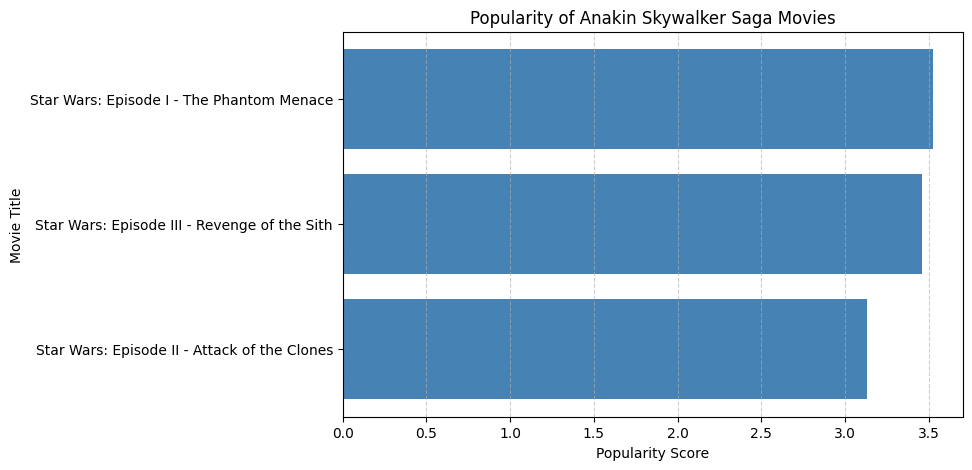

In [14]:
plt.figure(figsize=(8,5))
plt.barh(
    star_wars_sorted['original_title'],
    star_wars_sorted['popularity'],
    color='steelblue'
)

format_plot(
    title='Popularity of Anakin Skywalker Saga Movies',
    xlabel='Popularity Score',
    ylabel='Movie Title'
)

plt.show()


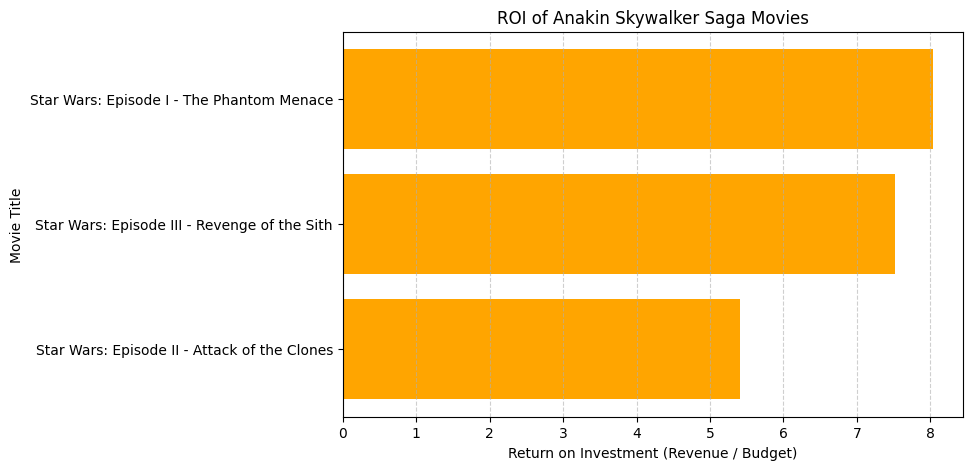

In [38]:
movies = star_wars_sorted['original_title']
roi = star_wars_sorted['ROI']
y_pos = np.arange(len(movies))

plt.figure(figsize=(8,5))
plt.barh(
    y_pos,
    roi,
    color='orange'
)

plt.yticks(y_pos, movies)

# Use reusable function for formatting
format_plot(
    title='ROI of Anakin Skywalker Saga Movies',
    xlabel='Return on Investment (Revenue / Budget)',
    ylabel='Movie Title'
)

plt.show()

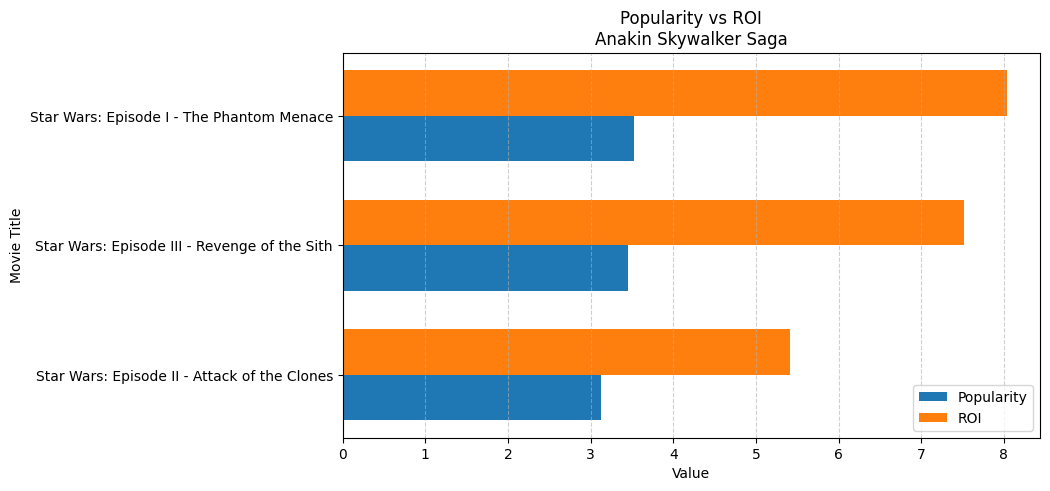

In [22]:
plt.figure(figsize=(9,5))
plt.barh(y_pos - bar_height/2, popularity, height=bar_height, label='Popularity')
plt.barh(y_pos + bar_height/2, roi, height=bar_height, label='ROI')

plt.yticks(y_pos, movies)
format_plot(
    'Popularity vs ROI\nAnakin Skywalker Saga',
    'Value',
    'Movie Title'
)
plt.legend()
plt.show()


## How does the average rating compare to the revenue?

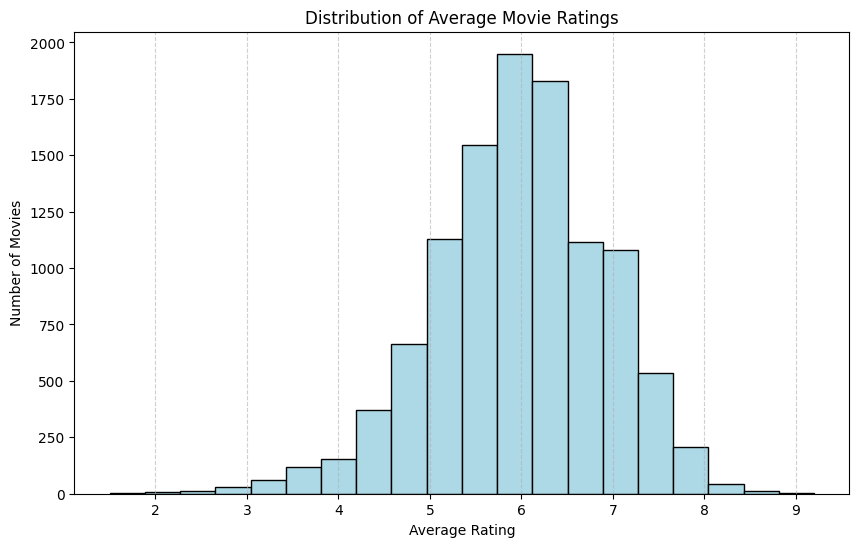

In [35]:
plt.figure(figsize=(10,6))
plt.hist(
    df['vote_average'],
    bins=20,
    edgecolor='black',
    color='lightblue'
)

format_plot(
    title='Distribution of Average Movie Ratings',
    xlabel='Average Rating',
    ylabel='Number of Movies'
)

plt.show()


The distribution of average movie ratings shows that most films are rated between 5 and 7. Extremely low or high ratings are relatively rare. This provides context for understanding how typical audience ratings are before comparing them to financial performance.

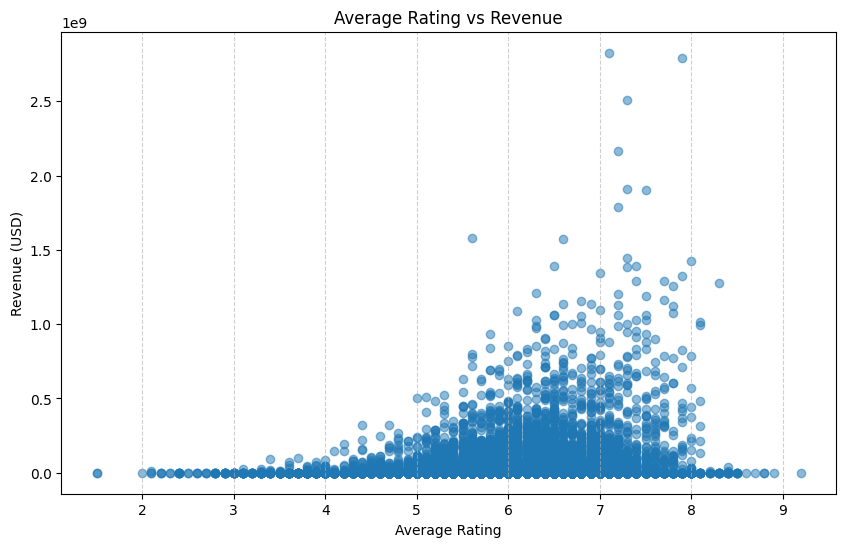

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['vote_average'],
    df['revenue_adj'],
    alpha=0.5
)

format_plot(
    title='Average Rating vs Revenue',
    xlabel='Average Rating',
    ylabel='Revenue (USD)'
)

plt.show()


The scatter plot shows a weak relationship between average rating and revenue. While highly rated movies can generate substantial revenue, many moderately rated films also achieve high financial success. This suggests that strong audience ratings alone do not guarantee higher revenue, and other factors such as marketing, franchise recognition, and release timing likely play significant roles.

<a id='conclusions'></a>
## Conclusions
This analysis explored patterns in movie production, audience ratings, popularity, and financial performance using the TMDb Movies dataset (1966–2015). Univariate exploration showed that movie production increased steadily over time, with most films receiving average audience ratings between 5 and 7. These findings provided important context before examining relationships between variables.

Bivariate analysis revealed that higher audience ratings do not necessarily correspond to higher revenue. While some highly rated movies achieved strong financial success, many moderately rated films also generated substantial revenue. This suggests that factors beyond audience ratings—such as marketing, franchise strength, and release timing—play a significant role in determining a movie’s financial performance.

Focusing specifically on the Anakin Skywalker saga, all three movies performed at relatively similar levels in terms of popularity, with Episode I: The Phantom Menace showing a slight lead. Regarding ROI, it is important to note that the dataset does not fully capture true ROI, as many financial factors (e.g., marketing costs, merchandising) are not publicly available. However, based on the data provided, Episode I also appears to have performed the strongest financially among the three films.

Overall, progressing from one-dimensional to two-dimensional analysis helped uncover both general trends and more nuanced relationships within the data. The exploratory approach highlighted the importance of examining multiple variables together rather than relying on a single metric when evaluating movie success.

## If I Had More Time and Resources

With additional time and resources, I would expand this analysis in several ways. First, I would investigate how ROI, and popularity vary across genres and production budgets to identify financially efficient genres or budget ranges. Second, I would explore multivariate relationships by including additional factors such as vote count and release timing to better understand how these features jointly influence a movie’s financial and audience success.

In [39]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 623282 bytes to Investigate_a_Dataset.html
